In [75]:
import pandas as pd
df = pd.read_excel('ETC콘존.xlsx')
df.head()

,콘존ID,콘존길이,기점종점방향구분코드,시작노드ID,종료노드ID,차로수,노선번호,제한속도,노선구성순번,시작노드,도착노드,버스전용차로유무,도로등급구분코드
0,0010CZE005,200,E,491,4,3.0,10,100,1,경부고속국도시점,구서IC,0.0,101.0
1,0010CZE010,1820,E,4,446,3.0,10,100,2,구서IC,영락IC,0.0,101.0
2,0010CZE011,1990,E,446,486,3.0,10,100,3,영락IC,부산TG,0.0,101.0
3,0010CZE020,1070,E,486,447,3.0,10,100,4,부산TG,노포,0.0,101.0
4,0010CZE030,7780,E,447,669,3.0,10,100,5,노포IC,노포JC,0.0,101.0


In [76]:
zone = df[['콘존ID','시작노드','도착노드']]
zone.head()

,콘존ID,시작노드,도착노드
0,0010CZE005,경부고속국도시점,구서IC
1,0010CZE010,구서IC,영락IC
2,0010CZE011,영락IC,부산TG
3,0010CZE020,부산TG,노포
4,0010CZE030,노포IC,노포JC


In [77]:
vel04 = pd.read_excel('7시구간통행속도240604.xlsx')
vel04 = vel04.rename(columns={'평균속도':'평균속도04'})
vel04.head()

,콘존ID,평균속도04
0,0010CZE010,72.80
1,0010CZE011,85.45
2,0010CZE020,0.00
3,0010CZE030,0.00
4,0010CZE035,92.32


In [78]:
vel12 = pd.read_excel('7시구간통행속도240612.xlsx')
vel20 = pd.read_excel('7시구간통행속도240620.xlsx')
vel24 = pd.read_excel('7시구간통행속도240624.xlsx')

In [79]:
vel12 = pd.read_excel('7시구간통행속도240612.xlsx')
vel12 = vel12.rename(columns={'평균속도':'평균속도12'})
vel20 = pd.read_excel('7시구간통행속도240620.xlsx')
vel20 = vel20.rename(columns={'평균속도':'평균속도20'})
vel24 = pd.read_excel('7시구간통행속도240624.xlsx')
vel24 = vel24.rename(columns={'평균속도':'평균속도24'})

In [80]:
# add the velocity column to zone
mdf = pd.merge(zone, vel04, on='콘존ID')
mdf = pd.merge(mdf, vel12, on='콘존ID')
mdf = pd.merge(mdf, vel20, on='콘존ID')
mdf = pd.merge(mdf, vel24, on='콘존ID')
mdf.head()

,콘존ID,시작노드,도착노드,평균속도04,평균속도12,평균속도20,평균속도24
0,0010CZE010,구서IC,영락IC,72.80,74.75,74.94,73.35
1,0010CZE011,영락IC,부산TG,85.45,87.03,87.09,84.51
2,0010CZE020,부산TG,노포,0.00,0.00,0.00,0.00
3,0010CZE030,노포IC,노포JC,0.00,0.00,0.00,0.00
4,0010CZE035,노포JC,양산JC,92.32,91.90,92.88,91.92


In [23]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1838 entries, 0 to 1837
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   콘존ID    1838 non-null   object 
 1   시작노드    1838 non-null   object 
 2   도착노드    1838 non-null   object 
 3   평균속도04  1838 non-null   float64
 4   평균속도12  1838 non-null   float64
 5   평균속도20  1838 non-null   float64
 6   평균속도24  1838 non-null   float64
dtypes: float64(4), object(3)
memory usage: 100.6+ KB


In [28]:
# no NaNs exist
# check the distribution of velocity values
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

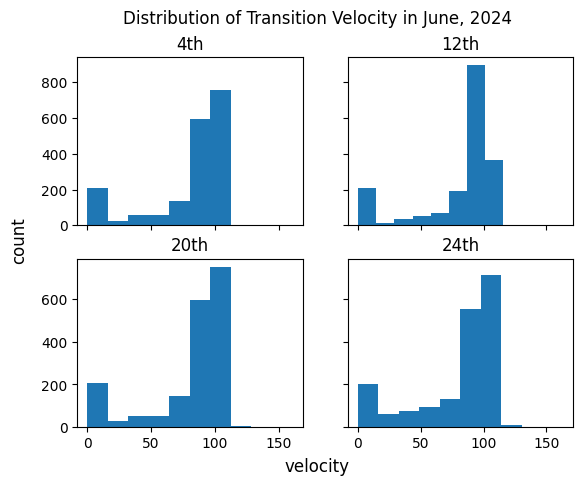

In [54]:
fig, axs = plt.subplots(2,2,sharex='col',sharey='row')
axs[0,0].hist(mdf['평균속도04'])
axs[0,1].hist(mdf['평균속도12'])
axs[1,0].hist(mdf['평균속도20'])
axs[1,1].hist(mdf['평균속도24'])
plt.suptitle('Distribution of Transition Velocity in June, 2024')
fig.supxlabel('velocity')
fig.supylabel('count')
axs[0,0].set_title('4th')
axs[0,1].set_title('12th')
axs[1,0].set_title('20th')
axs[1,1].set_title('24th')
# axs[0,0].set(xlabel='velocity',y='count',title='June 4th')
# plt.xlabel('logOfTotalTraffic')
# plt.ylabel('count')
plt.show() 

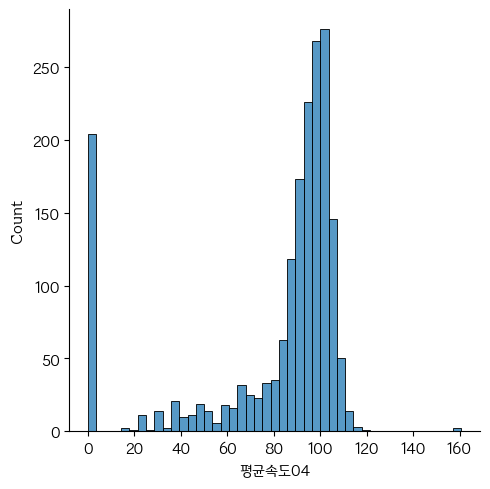

In [59]:
import matplotlib as mpl
import matplotlib.font_manager as fm
fm.fontManager.addfont('BinggraeII.ttf')
mpl.rcParams["font.family"] = 'Binggrae?'
sns.displot(mdf['평균속도04'])
plt.show()

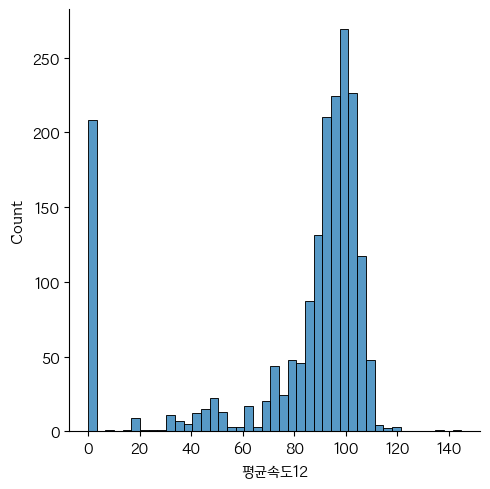

In [60]:
sns.displot(mdf['평균속도12'])
plt.show()

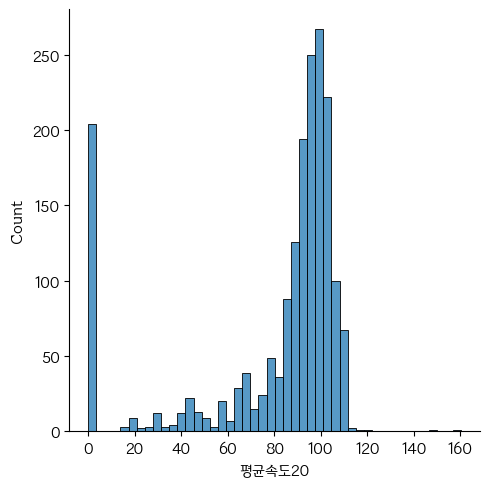

In [61]:
sns.displot(mdf['평균속도20'])
plt.show()

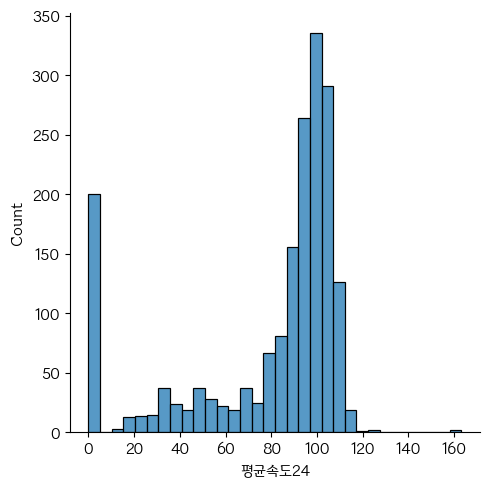

In [62]:
sns.displot(mdf['평균속도24'])
plt.show()

In [63]:
mdf['평균속도04'][:5]

0    72.80
1    85.45
2     0.00
3     0.00
4    92.32
Name: 평균속도04, dtype: float64

In [64]:
mdf['평균속도04'][3]==0

np.True_

In [67]:
# take the average of the four transition time without zero counted
# to make use of the previous code, replace 0.0 by NaN
temp = mdf['평균속도04'].copy()
temp

0        72.80
1        85.45
2         0.00
3         0.00
4        92.32
         ...  
1833    100.00
1834     70.20
1835      0.00
1836    100.38
1837     93.39
Name: 평균속도04, Length: 1838, dtype: float64

In [69]:
temp = temp.apply(lambda x: np.nan if x==0 else x)
temp

0        72.80
1        85.45
2          NaN
3          NaN
4        92.32
         ...  
1833    100.00
1834     70.20
1835       NaN
1836    100.38
1837     93.39
Name: 평균속도04, Length: 1838, dtype: float64

In [81]:
mdf['평균속도04'] = mdf['평균속도04'].apply(lambda x: np.nan if x==0 else x)
mdf['평균속도12'] = mdf['평균속도12'].apply(lambda x: np.nan if x==0 else x)
mdf['평균속도20'] = mdf['평균속도20'].apply(lambda x: np.nan if x==0 else x)
mdf['평균속도24'] = mdf['평균속도24'].apply(lambda x: np.nan if x==0 else x)
mdf.head()

,콘존ID,시작노드,도착노드,평균속도04,평균속도12,평균속도20,평균속도24
0,0010CZE010,구서IC,영락IC,72.80,74.75,74.94,73.35
1,0010CZE011,영락IC,부산TG,85.45,87.03,87.09,84.51
2,0010CZE020,부산TG,노포,NaN,NaN,NaN,NaN
3,0010CZE030,노포IC,노포JC,NaN,NaN,NaN,NaN
4,0010CZE035,노포JC,양산JC,92.32,91.90,92.88,91.92


In [82]:
# take the average of the four transition time without zero counted
tempZip = list(zip(mdf['평균속도04'].values,mdf['평균속도12'].values,
           mdf['평균속도20'].values,mdf['평균속도24'].values))
avgTrans = []
for i in range(len(tempZip)):
    avgTrans.append(np.nanmean(tempZip[i]))
mdf['평균속도'] = pd.Series(avgTrans)
mdf.head()

C:\Users\syj43\AppData\Local\Temp\ipykernel_10072\3281240275.py:6: RuntimeWarning: Mean of empty slice
  avgTrans.append(np.nanmean(tempZip[i]))


,콘존ID,시작노드,도착노드,평균속도04,평균속도12,평균속도20,평균속도24,평균속도
0,0010CZE010,구서IC,영락IC,72.80,74.75,74.94,73.35,73.960
1,0010CZE011,영락IC,부산TG,85.45,87.03,87.09,84.51,86.020
2,0010CZE020,부산TG,노포,NaN,NaN,NaN,NaN,NaN
3,0010CZE030,노포IC,노포JC,NaN,NaN,NaN,NaN,NaN
4,0010CZE035,노포JC,양산JC,92.32,91.90,92.88,91.92,92.255


In [88]:
mdf = mdf.drop(columns=['평균속도04','평균속도12','평균속도20','평균속도24'])
mdf = mdf.dropna()
mdf.head()

,콘존ID,시작노드,도착노드,평균속도
0,0010CZE010,구서IC,영락IC,73.9600
1,0010CZE011,영락IC,부산TG,86.0200
4,0010CZE035,노포JC,양산JC,92.2550
5,0010CZE040,양산JC,양산IC,87.8825
6,0010CZE050,양산IC,통도사Hi,90.4300


In [89]:
# add columns of node address
zoneAdress = pd.read_excel('ETC콘존주소.xlsx')
zoneAdress.head()

,콘존이름,세부주소1
0,북창원IC,경상남도
1,창원1터널(동측),경상남도
2,창원1터널(서측),경상남도
3,철원JC,강원도
4,88JC,인천광역시


In [90]:
# merged zone df
mzdf = pd.merge(mdf, zoneAdress, left_on='시작노드', right_on='콘존이름').drop('콘존이름', axis=1)
mzdf = pd.merge(mzdf, zoneAdress, left_on='도착노드', right_on='콘존이름').drop('콘존이름', axis=1)
mzdf.head()

,콘존ID,시작노드,도착노드,평균속도,세부주소1_x,세부주소1_y
0,0010CZE010,구서IC,영락IC,73.9600,부산광역시,부산광역시
1,0010CZE011,영락IC,부산TG,86.0200,부산광역시,부산광역시
2,0010CZE035,노포JC,양산JC,92.2550,부산광역시,경상남도
3,0010CZE040,양산JC,양산IC,87.8825,경상남도,경상남도
4,0010CZE050,양산IC,통도사Hi,90.4300,경상남도,울산광역시


In [91]:
# change names of the added columns and the order of columns
mzdf = mzdf.rename(columns={'세부주소1_x':'출발노드주소','세부주소1_y':'도착노드주소'})
mzdf = mzdf.iloc[:,[0,1,4,2,5,3]]
mzdf.head()

,콘존ID,시작노드,출발노드주소,도착노드,도착노드주소,평균속도
0,0010CZE010,구서IC,부산광역시,영락IC,부산광역시,73.9600
1,0010CZE011,영락IC,부산광역시,부산TG,부산광역시,86.0200
2,0010CZE035,노포JC,부산광역시,양산JC,경상남도,92.2550
3,0010CZE040,양산JC,경상남도,양산IC,경상남도,87.8825
4,0010CZE050,양산IC,경상남도,통도사Hi,울산광역시,90.4300


In [92]:
# truncate the average values
import math
mzdf['평균속도'] = mzdf['평균속도'].map(lambda x:math.trunc(x))
mzdf.head()

,콘존ID,시작노드,출발노드주소,도착노드,도착노드주소,평균속도
0,0010CZE010,구서IC,부산광역시,영락IC,부산광역시,73
1,0010CZE011,영락IC,부산광역시,부산TG,부산광역시,86
2,0010CZE035,노포JC,부산광역시,양산JC,경상남도,92
3,0010CZE040,양산JC,경상남도,양산IC,경상남도,87
4,0010CZE050,양산IC,경상남도,통도사Hi,울산광역시,90


In [93]:
# drop redundant columns and save it
mzdf = mzdf.drop(columns=['콘존ID','시작노드','도착노드'])
mzdf.to_csv('노드간통행속도.csv', index=False, encoding='utf-8')

In [ ]:
# end of the code